In [1]:
import graphlab

In [2]:
import os
os.chdir("c:/dellbackup/all things data science/datasets")

In [3]:
import numpy as np

function to convert sframe into a 2D numpy array

In [4]:
sales = graphlab.SFrame("kc_house_data.gl/")

This non-commercial license of GraphLab Create for academic use is assigned to rm83234n@pace.edu and will expire on September 18, 2017.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\Raisa\AppData\Local\Temp\graphlab_server_1479917231.log.0


In [5]:
def get_numpy_data(data_sframe,features,output):
    data_sframe["constant"] = 1
    features = ["constant"] + features
    features_sframe = data_sframe[features]
    feature_matrix = features_sframe.to_numpy()
    output_sarray = data_sframe[output]
    output_array = output_sarray.to_numpy()
    
    return (feature_matrix, output_array)

In [6]:
def predict_output(feature_matrix,weights):
    predictions = np.dot(feature_matrix,weights)
    return (predictions)

### computing the derivative
cost function is sum over the data points of the squared difference between an observed output and predicted output plus the l2_penalty term

cost(w0 = SUM[(prediction - output)**2 ] + l2_penalty*(w[0]^2 + w[1]^2 +...w[k]^2)

derivative is 2*sum(error[feature_i[) + 2*l2_penalty*w[i]

#note we are not regularizing the constant

In [7]:
def feature_derivative_ridge(errors,feature,weight,l2_penalty,feature_is_constant):
    if feature_is_constant == True:
        derivative = 2 * (np.dot(errors, feature))
    else:
        derivative = (2 * (np.dot(errors, feature))) + (2 * l2_penalty * weight)
    return derivative

In [8]:
#testing the above function
(example_features,example_output) = get_numpy_data(sales,["sqft_living"],"price")

In [9]:
my_weights = np.array([1.,10.])
test_predictions = predict_output(example_features,my_weights)

In [10]:
errors = test_predictions - example_output

In [11]:
print feature_derivative_ridge(errors, example_features[:,1],my_weights[1],1, False)

-5.65541667824e+13


In [12]:
print np.sum(errors*example_features[:,1])*2+20.
print ""

-5.65541667824e+13



In [13]:
print feature_derivative_ridge(errors,example_features[:,0],my_weights[0], 1, True)

-22446749336.0


In [14]:
print np.sum(errors)*2

-22446749336.0


In [15]:
my_weights

array([  1.,  10.])

In [16]:
my_weights[0]

1.0

In [19]:
example_features

array([[  1.00000000e+00,   1.18000000e+03],
       [  1.00000000e+00,   2.57000000e+03],
       [  1.00000000e+00,   7.70000000e+02],
       ..., 
       [  1.00000000e+00,   1.02000000e+03],
       [  1.00000000e+00,   1.60000000e+03],
       [  1.00000000e+00,   1.02000000e+03]])

### Gradient Descent
writing a function that performs a gradient descent. Given a starting point we update the current weights by moving in the negative gradient direction(because we are trying to minimize a cost function). The amount by which we move in the negative gradient direction is called the step size. We stop when we are sufficiently close to the optimum.This time we will set a maximum number of iterations and take gradient steps until we reach this maximum number. If no maximum number is supplied, the maximum should be set to 100 by default.  

In [51]:
def ridge_regression_gradient_descent(feature_matrix, output,initial_weights,step_size, l2_penalty, max_iterations=100):
    print "Starting gradient descent with l2_penalty = " + str(l2_penalty)
    
    weights = np.array(initial_weights) #making sure it's a numpy array
    iteration = 0 #iteration counter
    print_frequency = 1 #for adjusting frequency of debugging output
    
    #while not reached maximum number of iterations
    while iteration < max_iterations:
         #increment iteration counter
        if iteration == 10:
            print_frequency = 10
        if iteration == 100:
            print_frequency = 100
        if iteration%print_frequency==0:
            print('Iteration = ' + str(iteration))
        
    #computing the predictions based on feature_matrix and weights using our predict_output function
        predictions = predict_output(feature_matrix, weights)
    #computing the errors as predictions - output
        errors = predictions - output
    
    #printing the cost function from time to time
        if iteration%print_frequency == 0:
            print 'Cost function = ', str(np.dot(errors,errors) + l2_penalty*(np.dot(weights,weights) - weights[0]**2))

        for i in xrange(len(weights)): #loop over each weight
        #we know that feature_matrix[:,i] is the feature column of weights
        #computing the derivative for weight[i] and for i = 0 we are computing derivative of a constant
            if i== 0:
                derivative = feature_derivative_ridge(errors, feature_matrix[:,0], weights[0], l2_penalty, True)

            else:
                derivative = feature_derivative_ridge(errors, feature_matrix[:,i], weights[i], l2_penalty, False) 

                weights[i] = weights[i] - step_size*derivative
            iteration += 1
    print "Done with gradient descent at iteration ", iteration
    print "learned weights = ", str(weights)
    return weights
            
        
    

In [30]:
simple_features = ["sqft_living"]
my_output = "price"

In [31]:
#splitting the dataset into training set and test set
train_data,test_data = sales.random_split(.8,seed=0)

In [32]:
#using get_numpy_data to get numpy versions of our data with only sqft_living as a feature and price as output
(simple_feature_matrix,output) = get_numpy_data(train_data,simple_features,my_output)

In [33]:
(simple_test_feature_matrix,test_output) = get_numpy_data(test_data,simple_features,my_output)

Setting the parameters for our optimization


In [34]:
initial_weights = np.array([0.,0.])
step_size = 1e-12
max_iterations = 1000

In [52]:
#considering no regularization
l2_penalty = 0.0
simple_weights_0_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations)

Starting gradient descent with l2_penalty = 0.0
Iteration = 0
Cost function =  7.43305185103e+15
Iteration = 2
Cost function =  5.39426750061e+15
Iteration = 4
Cost function =  4.02323812014e+15
Iteration = 6
Cost function =  3.1012565669e+15
Iteration = 8
Cost function =  2.48124798311e+15
Iteration = 10
Cost function =  2.06430835714e+15
Iteration = 20
Cost function =  1.32597922215e+15
Iteration = 30
Cost function =  1.22444151371e+15
Iteration = 40
Cost function =  1.21047767868e+15
Iteration = 50
Cost function =  1.20855732129e+15
Iteration = 60
Cost function =  1.20829322676e+15
Iteration = 70
Cost function =  1.20825690752e+15
Iteration = 80
Cost function =  1.20825191276e+15
Iteration = 90
Cost function =  1.20825122587e+15
Iteration = 100
Cost function =  1.2082511314e+15
Iteration = 200
Cost function =  1.20825111634e+15
Iteration = 300
Cost function =  1.20825111634e+15
Iteration = 400
Cost function =  1.20825111634e+15
Iteration = 500
Cost function =  1.20825111634e+15
Iter

In [54]:
#considering high regularization
l2_penalty = 1e11
simple_weights_high_penalty = ridge_regression_gradient_descent(simple_feature_matrix,output, initial_weights,
                                                               step_size,l2_penalty, max_iterations=1000)

Starting gradient descent with l2_penalty = 1e+11
Iteration = 0
Cost function =  7.43305185103e+15
Iteration = 2
Cost function =  5.61830418589e+15
Iteration = 4
Cost function =  4.92061370357e+15
Iteration = 6
Cost function =  4.65238246765e+15
Iteration = 8
Cost function =  4.54925938119e+15
Iteration = 10
Cost function =  4.50961310017e+15
Iteration = 20
Cost function =  4.48505884525e+15
Iteration = 30
Cost function =  4.4848526116e+15
Iteration = 40
Cost function =  4.48485087943e+15
Iteration = 50
Cost function =  4.48485086488e+15
Iteration = 60
Cost function =  4.48485086475e+15
Iteration = 70
Cost function =  4.48485086475e+15
Iteration = 80
Cost function =  4.48485086475e+15
Iteration = 90
Cost function =  4.48485086475e+15
Iteration = 100
Cost function =  4.48485086475e+15
Iteration = 200
Cost function =  4.48485086475e+15
Iteration = 300
Cost function =  4.48485086475e+15
Iteration = 400
Cost function =  4.48485086475e+15
Iteration = 500
Cost function =  4.48485086475e+15
I

Plottin the two models. The blue line would be for the model with no regularization and red line for the one with high regularization


In [55]:
import matplotlib.pyplot as plt

In [56]:
%matplotlib inline

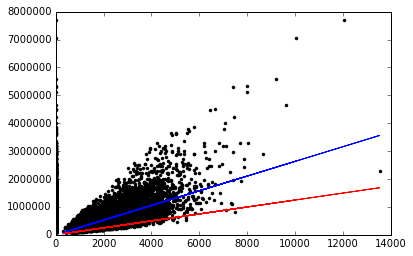

In [58]:
plt.plot(simple_feature_matrix,output,"k.",
        simple_feature_matrix,predict_output(simple_feature_matrix,simple_weights_0_penalty),"b-",
        simple_feature_matrix,predict_output(simple_feature_matrix,simple_weights_high_penalty),"r-")

In [59]:
def get_RSS(output,weights, feature_matrix):
    predictions = predict_output(feature_matrix,weights)
    errors = predictions - output
    RS = errors * errors
    RSS = RS.sum()
    return RSS

In [60]:
zero_weights = np.array([0.,0.])



In [61]:
get_RSS(test_output, zero_weights,simple_test_feature_matrix)

1784273282524564.0

In [62]:
get_RSS(test_output, simple_weights_0_penalty, simple_test_feature_matrix)

275723640878106.84

In [64]:
get_RSS(test_output, simple_weights_high_penalty, simple_test_feature_matrix)

694654370053842.0

### Running multiple regression with L2 penalty
considering the features as sqft_living and sqft_living15

In [66]:
model_features = ["sqft_living","sqft_living15"]
my_output = "price"
(feature_matrix,output) = get_numpy_data(train_data,model_features,my_output)
(test_feature_matrix,test_output) = get_numpy_data(test_data,model_features,my_output)

Since we now have an extra parameter we would have 3 weights now, initiazlizing them as follows

In [67]:
initial_weights = np.array([0.0,0.0,0.0])
step_size = 1e-12
max_iterations = 1000

In [68]:
#consider no regularization
l2_penalty = 0.0
multiple_weights_0_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations)

Starting gradient descent with l2_penalty = 0.0
Iteration = 0
Cost function =  7.43305185103e+15
Iteration = 3
Cost function =  4.05675256408e+15
Iteration = 6
Cost function =  2.52956531389e+15
Iteration = 9
Cost function =  1.83855681657e+15
Iteration = 12
Cost function =  1.52567563455e+15
Iteration = 15
Cost function =  1.38378951705e+15
Iteration = 18
Cost function =  1.31923260065e+15
Iteration = 21
Cost function =  1.28964885323e+15
Iteration = 24
Cost function =  1.27588469844e+15
Iteration = 27
Cost function =  1.26927877861e+15
Iteration = 30
Cost function =  1.26591434854e+15
Iteration = 33
Cost function =  1.26402019125e+15
Iteration = 36
Cost function =  1.26279530448e+15
Iteration = 39
Cost function =  1.26187742056e+15
Iteration = 42
Cost function =  1.26110266942e+15
Iteration = 45
Cost function =  1.26039689765e+15
Iteration = 48
Cost function =  1.25972652253e+15
Iteration = 51
Cost function =  1.25907630812e+15
Iteration = 54
Cost function =  1.25843931558e+15
Iterat

In [69]:
#considering high regularization
l2_penalty = 1e11
multiple_weights_high_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations)

Starting gradient descent with l2_penalty = 1e+11
Iteration = 0
Cost function =  7.43305185103e+15
Iteration = 3
Cost function =  4.46049002287e+15
Iteration = 6
Cost function =  3.79667473523e+15
Iteration = 9
Cost function =  3.64831982757e+15
Iteration = 12
Cost function =  3.61509143965e+15
Iteration = 15
Cost function =  3.60760312221e+15
Iteration = 18
Cost function =  3.60588674646e+15
Iteration = 21
Cost function =  3.60547534384e+15
Iteration = 24
Cost function =  3.6053656822e+15
Iteration = 27
Cost function =  3.60532996177e+15
Iteration = 30
Cost function =  3.60531489978e+15
Iteration = 33
Cost function =  3.60530706804e+15
Iteration = 36
Cost function =  3.60530250155e+15
Iteration = 39
Cost function =  3.60529970516e+15
Iteration = 42
Cost function =  3.60529796044e+15
Iteration = 45
Cost function =  3.60529686444e+15
Iteration = 48
Cost function =  3.6052961743e+15
Iteration = 51
Cost function =  3.60529573933e+15
Iteration = 54
Cost function =  3.60529546511e+15
Iterat

In [70]:
get_RSS(test_output,initial_weights,test_feature_matrix)

1784273282524564.0

In [71]:
get_RSS(test_output,multiple_weights_0_penalty,test_feature_matrix)

273684275330513.22

In [72]:
get_RSS(test_output,multiple_weights_high_penalty, test_feature_matrix)

500408548923844.44

In [75]:
predictions_zero = predict_output(test_feature_matrix, multiple_weights_0_penalty)

In [76]:
predictions_zero[0]

394271.37306161108

In [77]:
predictions_high = predict_output(test_feature_matrix, multiple_weights_high_penalty)

In [78]:
predictions_high[0]

270449.68688595097

In [79]:
test_feature_matrix[0]

array([  1.00000000e+00,   1.43000000e+03,   1.78000000e+03])

In [80]:
test_data["price"][0]

310000.0